In [1]:
#import librares
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf
import splitfolders  
import numpy as np
import pandas as pd
import cv2
from PIL import Image
from keras.preprocessing import image
import os
import numpy 
from sklearn import preprocessing
import random
from keras import regularizers

In [2]:
#dir for dataset
train_dir = "./Dataset/train"
test_dir = "./Dataset/test"

In [3]:
img_size=48

In [4]:
#datagen
train_datagen = ImageDataGenerator(width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [5]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [6]:
import tensorflow as tf
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization

model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(4, 4), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(4,4), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

In [7]:
model.compile(
      optimizer = Adam(lr=0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

C:\Users\Alexey\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [8]:
epochs = 60
batch_size = 64
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/60
359/359 [==============================] - 18s 42ms/step - loss: 5.2737 - accuracy: 0.2286 - val_loss: 2.9536 - val_accuracy: 0.2486
Epoch 2/60
359/359 [==============================] - 16s 43ms/step - loss: 2.3378 - accuracy: 0.3055 - val_loss: 2.5557 - val_accuracy: 0.1983
Epoch 3/60
359/359 [==============================] - 15s 41ms/step - loss: 2.3680 - accuracy: 0.3763 - val_loss: 2.3012 - val_accuracy: 0.3813
Epoch 4/60
359/359 [==============================] - 14s 39ms/step - loss: 2.2267 - accuracy: 0.4322 - val_loss: 2.3377 - val_accuracy: 0.4497
Epoch 5/60
359/359 [==============================] - 14s 39ms/step - loss: 2.1674 - accuracy: 0.4714 - val_loss: 2.1440 - val_accuracy: 0.4658
Epoch 6/60
359/359 [==============================] - 14s 38ms/step - loss: 2.1336 - accuracy: 0.4849 - val_loss: 2.2122 - val_accuracy: 0.4434
Epoch 7/60
359/359 [==============================] - 14s 39ms/step - loss: 2.1024 - accuracy: 0.4884 - val_loss: 2.1547 - val_accuracy:

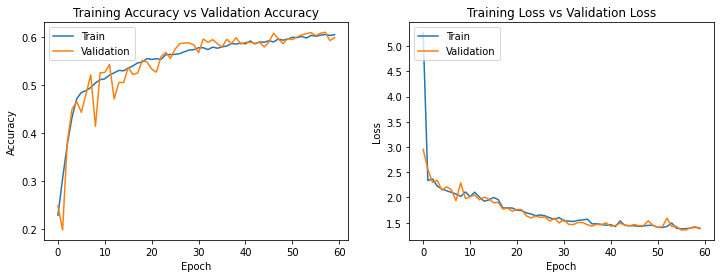

In [9]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [10]:
model.save_weights('model_weights_FER.h5')

1 лиц обнаружено на изображении.


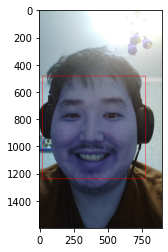

In [11]:
# Загрузка изображения
image_cv2 = cv2.imread("./test.jpeg")

# преобразуем изображение к оттенкам серого
image_gray = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2GRAY)

# инициализировать распознаватель лиц (каскад Хаара по умолчанию)
face_cascade = cv2.CascadeClassifier("haarcascade_fontalface_default.xml")

# обнаружение всех лиц на изображении
faces = face_cascade.detectMultiScale(image_gray)
# печатать количество найденных лиц

numfaces = 0
# для всех обнаруженных лиц рисуем синий квадрат
for x, y, width, height in faces:
    if (width-x)>20:
        cv2.rectangle(image_cv2, (x, y), (x + width, y + height), color=(255, 0, 0), thickness=2)
        numfaces+=1
        img = Image.open("./test.jpeg")
        img_crop = img.crop((x, y, x + width, y + height))
        img_crop.save("testing.jpg", quality=95)

print(f"{numfaces} лиц обнаружено на изображении.")
# сохраняем изображение с обнаруженными лицами
plt.imshow(image_cv2)
plt.show()

(48, 48)


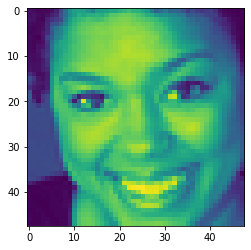

In [82]:
img = image.load_img("./Dataset/train/happy/im124.png",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape) #prints (48,48) that is the shape of our image

In [66]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

23/23 [==============================] - 0s 17ms/step - loss: 1.3784 - accuracy: 0.5992 0s - loss: 1.3770 - accu
final train accuracy = 65.02 , validation accuracy = 59.92


In [62]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

In [85]:
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

[0.0, 0.0, 2.4999925e-20, 1.0, 9.148594e-30, 0.0, 2.9849643e-34]
Happy


In [16]:
model.save("model.h5")

In [17]:
from tensorflow.keras.models import load_model

In [18]:
new_model = load_model('model.h5')